In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")
# Use py3.9 kernel

Device: cpu


## Load MNIST data

In [2]:
from datasets import mnist
from torchvision import datasets, transforms
from torchvision.utils import make_grid

mnist_batch_size = 8
mnist_size = 28

# 28 x 28 is the default size
# using mnist function written in datasets.py
# https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST
train_loader, test_loader = mnist(batch_size = mnist_batch_size, size = mnist_size)

/Users/kimbente/opt/anaconda3/envs/py3.9/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/kimbente/opt/anaconda3/envs/py3.9/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <67CD63CE-57E0-341F-B3B8-78729B03D2B3> /Users/kimbente/opt/anaconda3/envs/py3.9/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <18497461-1393-3DF8-BED0-DC986FDB1051> /Users/kimbente/opt/anaconda3/envs/py3.9/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


## Visualise 

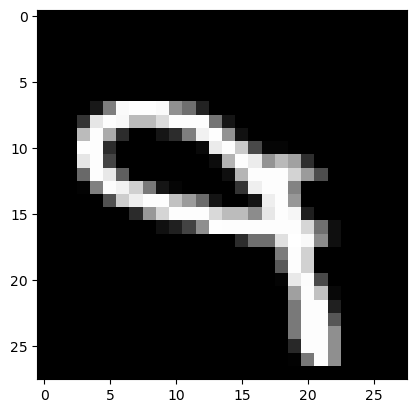

In [3]:
# show single image from test

for _, data in enumerate(train_loader):
    # unpack data
    images, labels = data
    # select single image and reshape
    image = images[1, :, :, :].squeeze()
    break

plt.imshow(image.squeeze().numpy(), cmap = 'gray')


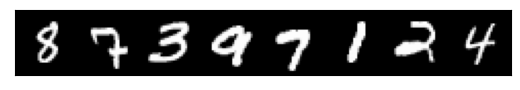

In [4]:
# show batch of test iamges
for _, data in enumerate(train_loader):
    # unpack data
    images, labels = data
    # only extract one batch and break
    break

import torchvision.transforms.functional as F

# show function
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols = len(imgs), squeeze = False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels = [], yticklabels = [], xticks = [], yticks = [])

# images: 4D mini-batch Tensor of shape (B x C x H x W)
image_grid = make_grid(images) 
show(image_grid)

## Explore masking

In [51]:
from utils import mask_to_np_input

# Create byte tensor 
mask_tensor = (torch.rand((mnist_size, mnist_size)) > 0.9).byte()
mask_tensor = torch.tile(mask_tensor, dims = (8, 1, 1))
mask_to_np_input(img = images, mask = mask_tensor)


(tensor([[[-1.0000, -0.6429],
          [-1.0000, -0.0714],
          [-0.9286, -0.2857],
          ...,
          [ 0.9286, -0.1429],
          [ 0.9286,  0.3571],
          [ 0.9286,  0.4286]],
 
         [[-1.0000, -0.6429],
          [-1.0000, -0.0714],
          [-0.9286, -0.2857],
          ...,
          [ 0.9286, -0.1429],
          [ 0.9286,  0.3571],
          [ 0.9286,  0.4286]],
 
         [[-1.0000, -0.6429],
          [-1.0000, -0.0714],
          [-0.9286, -0.2857],
          ...,
          [ 0.9286, -0.1429],
          [ 0.9286,  0.3571],
          [ 0.9286,  0.4286]],
 
         ...,
 
         [[-1.0000, -0.6429],
          [-1.0000, -0.0714],
          [-0.9286, -0.2857],
          ...,
          [ 0.9286, -0.1429],
          [ 0.9286,  0.3571],
          [ 0.9286,  0.4286]],
 
         [[-1.0000, -0.6429],
          [-1.0000, -0.0714],
          [-0.9286, -0.2857],
          ...,
          [ 0.9286, -0.1429],
          [ 0.9286,  0.3571],
          [ 0.9286,  0.4286